In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('superstore_dataset2011-2015.csv', encoding='unicode_escape')

In [3]:
# df.columns

# Drop irrelevant columns
df.drop(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category'], axis=1, inplace=True)

# Rename columns
# df.columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Check for missing values
# df.isnull().sum()

In [4]:
df.columns

Index(['Order ID', 'Customer ID', 'Market', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.sample(n=5)

,Order ID,Customer ID,Market,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
26109,ID-2014-56983,BV-11245,APAC,"Enermax Mouse, Programmable",208.950,5,0.00,91.800,23.11,Low
30110,CA-2012-153038,RB-19645,US,"Master Caster Door Stop, Brown",20.320,5,0.20,3.556,2.23,Medium
36015,ES-2012-5708011,SB-20185,EU,"Binney & Smith Pens, Fluorescent",26.400,2,0.00,0.480,0.32,Medium
20546,IR-2011-2310,JE-5475,EMEA,"Acco Index Tab, Clear",16.080,2,0.00,6.720,2.61,High
17213,ID-2014-55338,JW-15220,APAC,"Bush Library with Doors, Metal",945.828,4,0.35,-392.892,57.02,Medium


In [6]:
df.drop(['Order ID'], axis=1, inplace=True)

In [7]:
df.drop(['Profit'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Customer ID', 'Market', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df.sample(n=6)

,Customer ID,Market,Product Name,Sales,Quantity,Discount,Shipping Cost,Order Priority
49177,RB-9435,EMEA,"Cisco Smart Phone, Cordless",1172.6640,6,0.70,239.69,High
2560,JD-16015,EU,"BIC Pencil Sharpener, Water Color",64.3800,2,0.00,5.21,High
16875,JP-15520,APAC,"Tenex Shelving, Wire Frame",222.9795,5,0.17,40.93,Medium
3524,AG-10495,EU,"Wilson Jones 3-Hole Punch, Recycled",141.7500,5,0.00,6.35,Medium
41210,HK-14890,LATAM,"Belkin Flash Drive, Erganomic",127.2000,6,0.20,13.34,Low
10770,KB-16315,US,Blue String-Tie & Button Interoffice Envelopes...,95.9520,3,0.20,6.95,Medium


In [10]:
summary_stats = df.describe()
print(summary_stats)

              Sales      Quantity      Discount  Shipping Cost
count  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581      3.476545      0.142908      26.375915
std      487.565361      2.278766      0.212280      57.296804
min        0.444000      1.000000      0.000000       0.000000
25%       30.758625      2.000000      0.000000       2.610000
50%       85.053000      3.000000      0.000000       7.790000
75%      251.053200      5.000000      0.200000      24.450000
max    22638.480000     14.000000      0.850000     933.570000


In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Customer ID       0
Market            0
Product Name      0
Sales             0
Quantity          0
Discount          0
Shipping Cost     0
Order Priority    0
dtype: int64


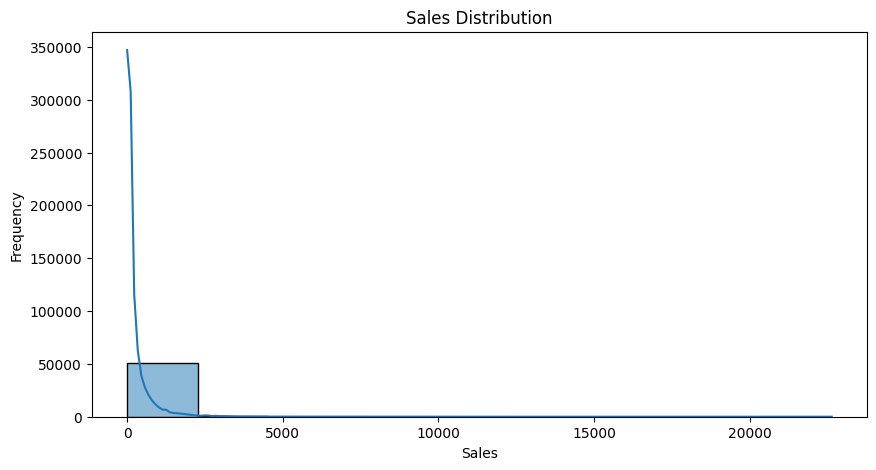

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribuion
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

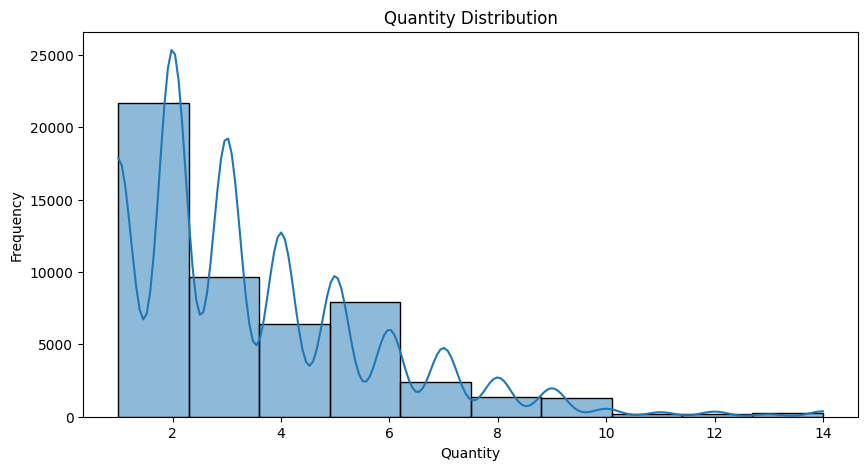

In [13]:
# Quantity distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

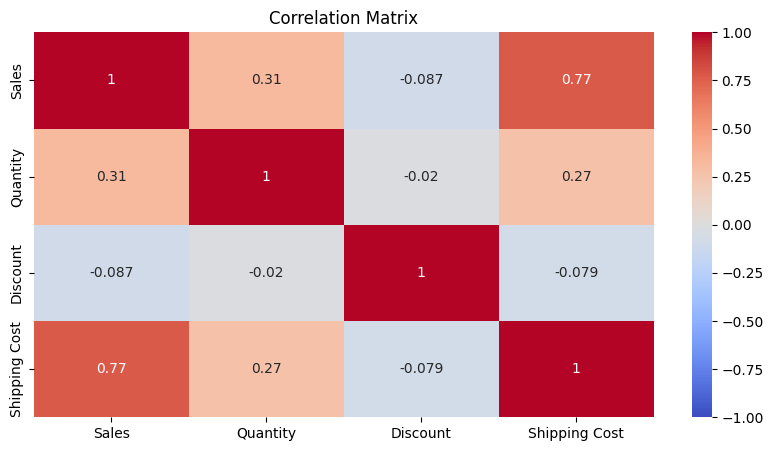

In [14]:
# Select only numerical columns
numerical_df = df[['Sales', 'Quantity', 'Discount', 'Shipping Cost']]

# Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

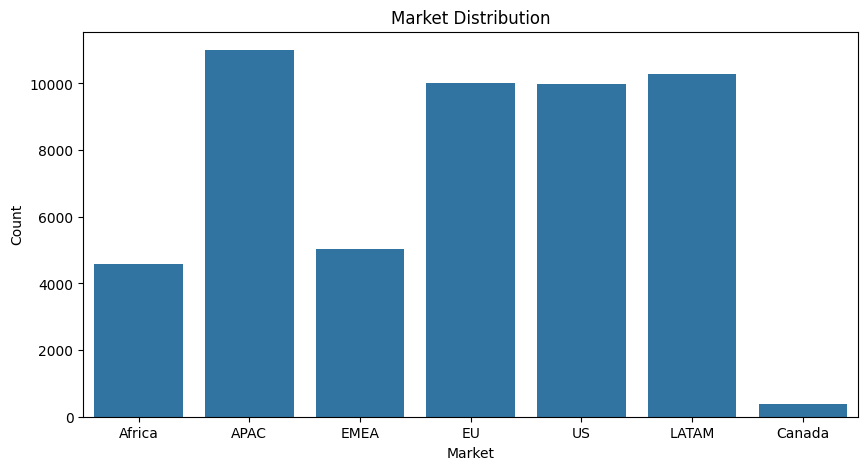

In [15]:
# Market distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Market', data=df)
plt.title('Market Distribution')
plt.xlabel('Market')
plt.ylabel('Count')
plt.show()

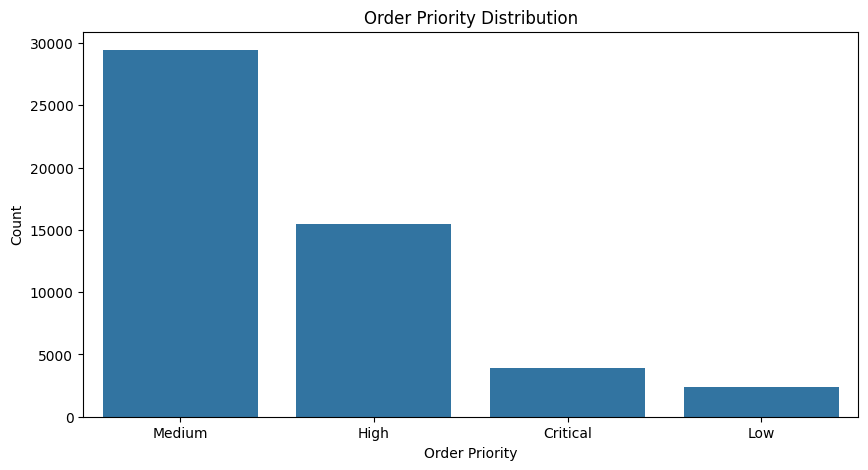

In [16]:
# Order Priority distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Order Priority', data=df)
plt.title('Order Priority Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

In [18]:
label_encoder = LabelEncoder()
# Apply label encoding to categoricaal columnss
df['Customer ID'] = label_encoder.fit_transform(df['Customer ID'])
df['Market'] = label_encoder.fit_transform(df['Market'])
df['Product Name'] = label_encoder.fit_transform(df['Product Name'])
df['Order Priority'] = label_encoder.fit_transform(df['Order Priority'])

In [19]:
numerical_cols = ['Quantity', 'Discount', 'Shipping Cost']
scaler = StandardScaler()
# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [21]:
X

,Customer ID,Market,Product Name,Quantity,Discount,Shipping Cost,Order Priority
0,1468,1,3413,-0.647964,-0.673210,0.158546,3
1,741,0,168,-0.209126,-0.202129,-0.290698,3
2,119,3,3382,0.229712,-0.673210,-0.317751,1
3,541,4,1330,-0.209126,1.682194,-0.376219,1
4,741,0,1228,0.668550,-0.202129,-0.378313,3
...,...,...,...,...,...,...,...
51285,499,6,898,-0.647964,0.268952,-0.444810,3
51286,939,1,3541,-1.086803,-0.673210,-0.451791,3
51287,313,5,1820,-0.209126,-0.673210,-0.454234,3
51288,1495,5,1847,-1.086803,-0.673210,-0.456852,3


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a RandomForestClassifier
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 85.14
Mean Squared Error: 90890.43
R-squared: 0.65


In [25]:
print("Data types before encoding:\n", df.dtypes)

Data types before encoding:
 Customer ID         int32
Market              int32
Product Name        int32
Sales             float64
Quantity          float64
Discount          float64
Shipping Cost     float64
Order Priority      int32
dtype: object


In [26]:
new_data = [[313,5,1820,-0.209126,-0.673210,-0.454234,3]]
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 28.90


C:\Users\AhmAD\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)  # Number of neighbors
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"K-Nearest Neighbors Regressor MAE: {mae:.2f}")
print(f"K-Nearest Neighbors Regressor MSE: {mse:.2f}")
print(f"K-Nearest Neighbors Regressor R-squared: {r2:.2f}")

K-Nearest Neighbors Regressor MAE: 219.23
K-Nearest Neighbors Regressor MSE: 239187.78
K-Nearest Neighbors Regressor R-squared: 0.08


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor MAE: {mae:.2f}")
print(f"Gradient Boosting Regressor MSE: {mse:.2f}")
print(f"Gradient Boosting Regressor R-squared: {r2:.2f}")


Gradient Boosting Regressor MAE: 82.64
Gradient Boosting Regressor MSE: 89018.42
Gradient Boosting Regressor R-squared: 0.66


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor MAE: {mae:.2f}")
print(f"Decision Tree Regressor MSE: {mse:.2f}")
print(f"Decision Tree Regressor R-squared: {r2:.2f}")


Decision Tree Regressor MAE: 111.70
Decision Tree Regressor MSE: 140405.95
Decision Tree Regressor R-squared: 0.46


In [28]:
# Save LabelEncoder and StandardScaler
joblib.dump(label_encoder, 'label_encoder2.pkl')
# joblib.dump(scaler, 'scaler.pkl')

['label_encoder2.pkl']